In [ ]:
import numpy as np
import pandas as pd
print('Pandas version:', pd.__version__)
import matplotlib.pyplot as plt
import networkx as nx
import warnings
import seaborn as sns
from math import e
warnings.filterwarnings('ignore')

Pandas version: 1.3.5


In [ ]:
!mkdir /root/.kaggle/ 

In [ ]:
import json
import os

# Installing the Kaggle package
!pip install kaggle 

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"orharush","key":"c9305211cc70ba0f47f2988ece90437b"}


# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# searching for the dataset from kaggle api

!kaggle datasets list -s Football-Events

ref                                                       title                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------  ------------------------------  ----  -------------------  -------------  ---------  ---------------  
datasets/secareanualin/football-events                    Football Events                 21MB  2017-01-25 01:19:19          21435        564  0.7647059        
datasets/prathamsharma123/comprehensive-football-dataset  Comprehensive Football Dataset  21MB  2021-02-09 04:28:09            127         10  1.0              
datasets/joausaga/football-events-dictionary              Football Events Dictionary      822B  2018-02-22 14:10:56             41          1  0.29411766       
datasets/fernandojvdasilva/football-events-ner-data       Football Events - NER Data      61KB  2019-04-06 03:09:38             49          0  0.0625           
datasets/fernandojvdasilva/footbal

In [ ]:
# Creating a dataset directory
!mkdir ./datasets
!mkdir ./datasets/Football-Events
#!mkdir ./datasets/Football-Events/database.sqlite/

In [ ]:
#Downloading Football Events dataset
# download the dataset from Kaggle and unzip it
!kaggle datasets download secareanualin/Football-Events -p ./datasets/Football-Events/
!chdir ./datasets/Football-Events/
!unzip ./datasets/Football-Events/*.zip  -d ./datasets/Football-Events/

  0% 0.00/21.1M [00:00<?, ?B/s]
100% 21.1M/21.1M [00:00<00:00, 223MB/s]
/bin/bash: chdir: command not found
Archive:  ./datasets/Football-Events/Football-Events.zip
  inflating: ./datasets/Football-Events/dictionary.txt  
  inflating: ./datasets/Football-Events/events.csv  
  inflating: ./datasets/Football-Events/ginf.csv  


In [ ]:
!ls ./datasets/Football-Events

dictionary.txt	events.csv  Football-Events.zip  ginf.csv


In [ ]:
try:
    df1 = pd.read_csv("/content/datasets/Football-Events/events.csv" , encoding='cp437')
    print("Loaded.")
except:
    print("Error.")

Loaded.


In [ ]:
try:
    df2 = pd.read_csv("/content/datasets/Football-Events/ginf.csv" , encoding='cp437')
    print("Loaded.")
except:
    print("Error.")

Loaded.


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941009 entries, 0 to 941008
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id_odsp        941009 non-null  object 
 1   id_event       941009 non-null  object 
 2   sort_order     941009 non-null  int64  
 3   time           941009 non-null  int64  
 4   text           941009 non-null  object 
 5   event_type     941009 non-null  int64  
 6   event_type2    214293 non-null  float64
 7   side           941009 non-null  int64  
 8   event_team     941009 non-null  object 
 9   opponent       941009 non-null  object 
 10  player         880009 non-null  object 
 11  player2        291310 non-null  object 
 12  player_in      51715 non-null   object 
 13  player_out     51738 non-null   object 
 14  shot_place     227459 non-null  float64
 15  shot_outcome   228498 non-null  float64
 16  is_goal        941009 non-null  int64  
 17  location       467067 non-nul

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10112 entries, 0 to 10111
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id_odsp    10112 non-null  object 
 1   link_odsp  10112 non-null  object 
 2   adv_stats  10112 non-null  bool   
 3   date       10112 non-null  object 
 4   league     10112 non-null  object 
 5   season     10112 non-null  int64  
 6   country    10112 non-null  object 
 7   ht         10112 non-null  object 
 8   at         10112 non-null  object 
 9   fthg       10112 non-null  int64  
 10  ftag       10112 non-null  int64  
 11  odd_h      10112 non-null  float64
 12  odd_d      10112 non-null  float64
 13  odd_a      10112 non-null  float64
 14  odd_over   977 non-null    float64
 15  odd_under  977 non-null    float64
 16  odd_bts    977 non-null    float64
 17  odd_bts_n  977 non-null    float64
dtypes: bool(1), float64(7), int64(3), object(7)
memory usage: 1.3+ MB


In [ ]:
df1.describe()

,sort_order,time,event_type,event_type2,side,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
count,941009.000000,941009.000000,941009.000000,214293.000000,941009.000000,227459.000000,228498.000000,941009.000000,467067.000000,229185.000000,941009.000000,229137.000000,941009.000000
mean,53.858826,49.663663,4.326575,12.233764,1.481170,5.733693,1.926555,0.025978,6.209073,1.624831,0.264332,1.281316,0.004876
std,32.014268,26.488977,2.995313,0.468850,0.499646,3.326100,0.797055,0.159071,5.421736,0.740400,0.655501,0.709394,0.069655
min,1.000000,0.000000,1.000000,12.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,27.000000,27.000000,2.000000,12.000000,1.000000,2.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000
50%,53.000000,51.000000,3.000000,12.000000,1.000000,5.000000,2.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000
75%,79.000000,73.000000,8.000000,12.000000,2.000000,9.000000,3.000000,0.000000,11.000000,2.000000,0.000000,1.000000,0.000000
max,180.000000,100.000000,11.000000,15.000000,2.000000,13.000000,4.000000,1.000000,19.000000,3.000000,4.000000,4.000000,1.000000


In [ ]:
df2.describe()

,season,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
count,10112.000000,10112.000000,10112.000000,10112.000000,10112.000000,10112.000000,977.000000,977.000000,977.000000,977.000000
mean,2014.290249,1.548062,1.154964,2.930120,4.278434,5.537545,2.046817,2.105629,1.942917,2.063941
std,1.610074,1.309591,1.142596,2.370135,1.863643,5.700485,0.367062,0.536646,0.211102,0.251276
min,2012.000000,0.000000,0.000000,1.060000,1.910000,1.110000,1.140000,1.420000,1.410000,1.440000
25%,2013.000000,1.000000,0.000000,1.760000,3.430000,2.740000,1.790000,1.780000,1.800000,1.870000
50%,2014.000000,1.000000,1.000000,2.270000,3.680000,3.860000,2.030000,1.970000,1.920000,2.050000
75%,2016.000000,2.000000,2.000000,3.080000,4.300000,6.000000,2.280000,2.270000,2.050000,2.200000
max,2017.000000,10.000000,9.000000,46.000000,35.000000,81.000000,3.400000,7.500000,3.250000,3.460000


In [ ]:
df1.corr()

,sort_order,time,event_type,event_type2,side,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
sort_order,1.000000,0.947250,0.026910,0.002374,0.008273,-0.001873,-0.010904,0.001942,-0.001870,-0.000192,-0.017561,0.007689,0.011868
time,0.947250,1.000000,0.020504,-0.008898,0.005235,-0.002687,-0.009503,0.004524,0.011627,-0.004724,-0.009880,-0.004081,0.010997
event_type,0.026910,0.020504,1.000000,0.872814,0.030552,0.002827,NaN,-0.181353,-0.717710,-0.007678,-0.447777,0.005075,-0.077738
event_type2,0.002374,-0.008898,0.872814,1.000000,0.028143,-0.004296,-0.024400,-0.070693,0.116820,-0.057724,-0.628870,-0.022952,-0.069514
side,0.008273,0.005235,0.030552,0.028143,1.000000,0.002161,0.002105,-0.018046,-0.027981,-0.016465,-0.030710,-0.011913,-0.001515
shot_place,-0.001873,-0.002687,0.002827,-0.004296,0.002161,1.000000,-0.306615,-0.029265,-0.041362,0.116835,0.062178,0.209643,0.051322
shot_outcome,-0.010904,-0.009503,NaN,-0.024400,0.002105,-0.306615,1.000000,-0.396532,0.102751,-0.064234,-0.103168,-0.025466,-0.036209
is_goal,0.001942,0.004524,-0.181353,-0.070693,-0.018046,-0.029265,-0.396532,1.000000,0.109981,-0.000840,0.231330,0.088813,0.146052
location,-0.001870,0.011627,-0.717710,0.116820,-0.027981,-0.041362,0.102751,0.109981,1.000000,-0.373770,0.265875,-0.021526,0.052957
bodypart,-0.000192,-0.004724,-0.007678,-0.057724,-0.016465,0.116835,-0.064234,-0.000840,-0.373770,1.000000,0.279845,0.182869,-0.036467


In [ ]:
df2.corr()

,adv_stats,season,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
adv_stats,1.000000,0.329867,-0.002170,-0.013743,0.011216,0.005219,0.006103,NaN,NaN,NaN,NaN
season,0.329867,1.000000,-0.011237,0.001784,0.049611,0.031705,0.005069,NaN,NaN,NaN,NaN
fthg,-0.002170,-0.011237,1.000000,-0.059805,-0.240801,0.288969,0.361478,-0.244443,0.251837,0.017735,0.001079
ftag,-0.013743,0.001784,-0.059805,1.000000,0.299424,-0.050605,-0.199595,-0.099825,0.034237,-0.164960,0.149443
odd_h,0.011216,0.049611,-0.240801,0.299424,1.000000,0.071255,-0.358183,-0.112535,0.076239,-0.001412,-0.002349
odd_d,0.005219,0.031705,0.288969,-0.050605,0.071255,1.000000,0.869377,-0.643428,0.890038,0.269658,-0.199582
odd_a,0.006103,0.005069,0.361478,-0.199595,-0.358183,0.869377,1.000000,-0.457703,0.698667,0.394644,-0.309923
odd_over,NaN,NaN,-0.244443,-0.099825,-0.112535,-0.643428,-0.457703,1.000000,-0.831154,0.402242,-0.444216
odd_under,NaN,NaN,0.251837,0.034237,0.076239,0.890038,0.698667,-0.831154,1.000000,-0.143452,0.214141
odd_bts,NaN,NaN,0.017735,-0.164960,-0.001412,0.269658,0.394644,0.402242,-0.143452,1.000000,-0.910499


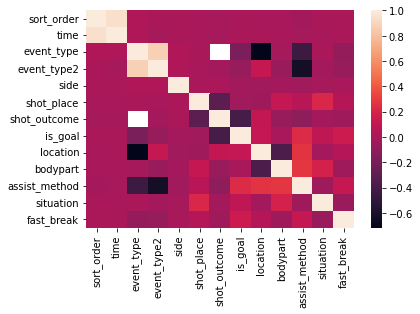

In [ ]:
sns.heatmap(df1.corr());

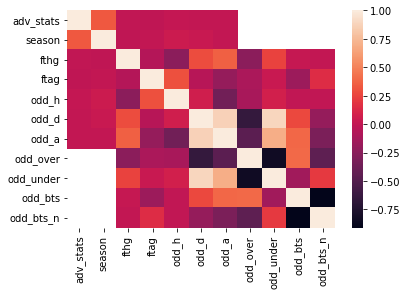

In [ ]:
sns.heatmap(df2.corr());

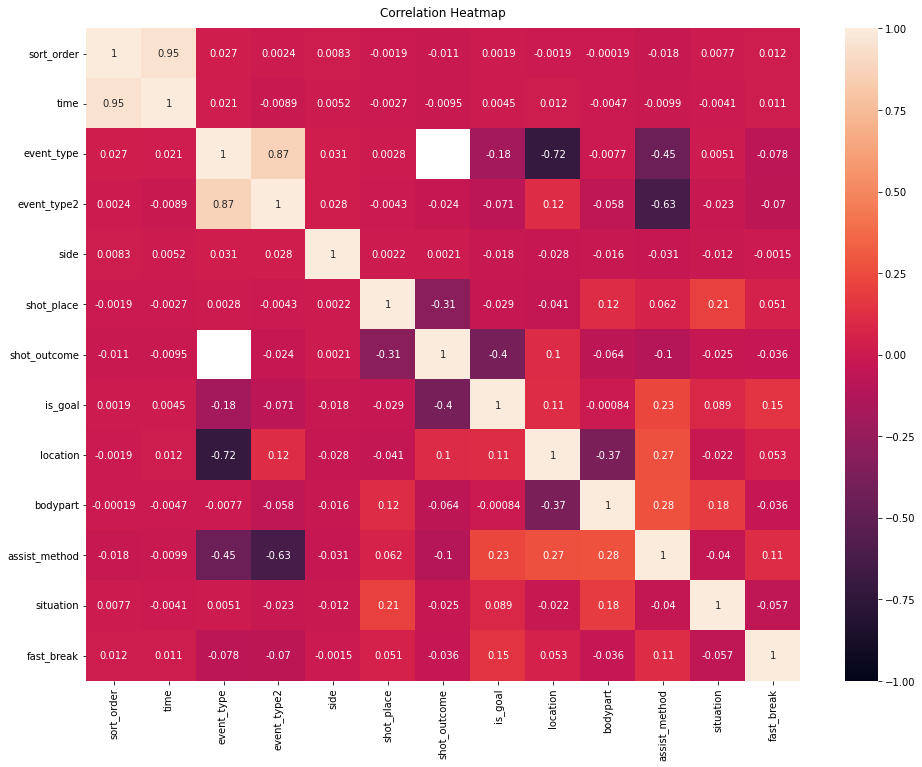

In [ ]:
plt.figure(figsize=(16, 12))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

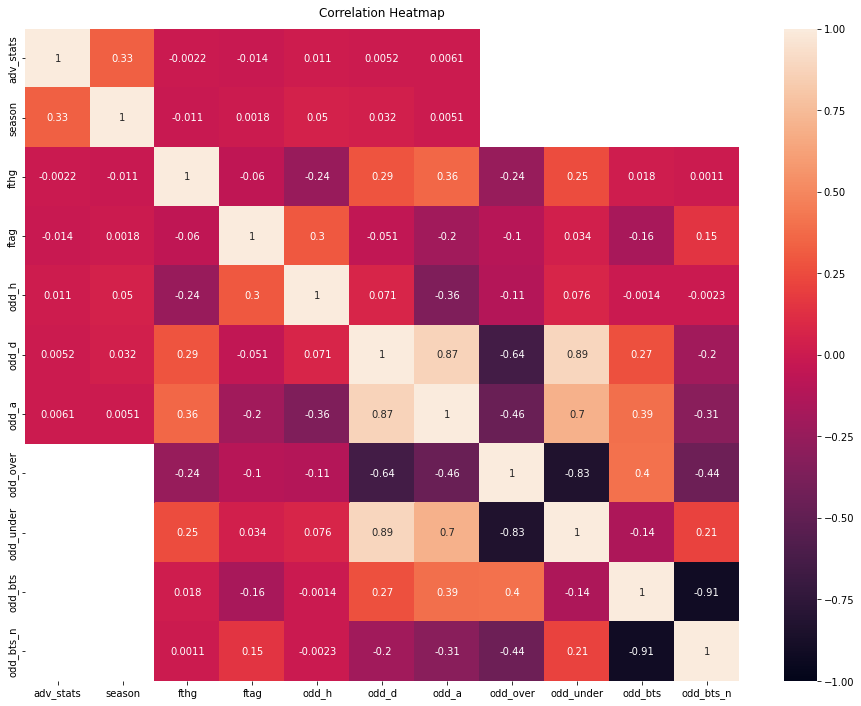

In [ ]:
plt.figure(figsize=(16, 12))
heatmap = sns.heatmap(df2.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
list(df1)

['id_odsp',
 'id_event',
 'sort_order',
 'time',
 'text',
 'event_type',
 'event_type2',
 'side',
 'event_team',
 'opponent',
 'player',
 'player2',
 'player_in',
 'player_out',
 'shot_place',
 'shot_outcome',
 'is_goal',
 'location',
 'bodypart',
 'assist_method',
 'situation',
 'fast_break']

In [ ]:
list(df2)

['id_odsp',
 'link_odsp',
 'adv_stats',
 'date',
 'league',
 'season',
 'country',
 'ht',
 'at',
 'fthg',
 'ftag',
 'odd_h',
 'odd_d',
 'odd_a',
 'odd_over',
 'odd_under',
 'odd_bts',
 'odd_bts_n']

In [ ]:
def pandas_entropy(column, base=None):
    vc = pd.Series(column).value_counts(normalize=True, sort=False)
    base = 2 if base is None else base
    return -(vc * np.log(vc)/np.log(2)).sum()

In [ ]:
df1.apply(pandas_entropy)

id_odsp          13.131689
id_event         19.843849
sort_order        6.900081
time              6.469721
text             16.958359
event_type        2.562294
event_type2       0.839092
side              0.998977
event_team        6.931120
opponent          6.952483
player           11.579478
player2          11.549991
player_in        11.559233
player_out       11.406284
shot_place        3.328393
shot_outcome      1.643180
is_goal           0.173805
location          3.058220
bodypart          1.427644
assist_method     0.910089
situation         0.842618
fast_break        0.044463
dtype: float64

In [ ]:
df2.apply(pandas_entropy)

id_odsp      13.303781
link_odsp    13.303781
adv_stats     0.443011
date          9.305648
league        2.316820
season        2.555770
country       2.316820
ht            6.993854
at            6.996266
fthg          2.289280
ftag          2.043160
odd_h         8.197605
odd_d         6.900120
odd_a         8.641697
odd_over      6.921361
odd_under     6.968625
odd_bts       5.438173
odd_bts_n     6.077697
dtype: float64

In [ ]:
df1.apply(pandas_entropy).min()

0.044462568343713114

In [ ]:
df2.apply(pandas_entropy).min()

0.4430112517937306

In [ ]:
def gini_index(data, column):
  return 1 - np.sum(np.square(data[column].value_counts(normalize=True)))

In [ ]:
gini_index(df1, 'fast_break')

0.009703691817308346

In [ ]:
gini_index(df1, 'event_type2')

0.34513645855384056

In [ ]:
gini_index(df2, 'adv_stats')

0.16702293490125775

In [ ]:
gini_index(df2, 'ftag')

0.7204536055357215

In [ ]:
!pip install info_gain

In [ ]:
from info_gain import info_gain
info_gain.info_gain(df1["fast_break"], df1["is_goal"])

In [ ]:
info_gain.info_gain(df2["adv_stats"], df2["ftag"])

0.0004436260618403409